In [175]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import tensorflow as tf
from dataset import load_hoda

In [176]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [177]:
x_train_original = x_train_original.reshape(-1,5,5)

In [178]:
x_test_original = x_test_original.reshape(-1,5,5)

In [179]:
x_test_original.shape

(200, 5, 5)

In [180]:
x_train_original.shape

(1000, 5, 5)

In [181]:
y_train_original.max()+1

np.uint8(10)

In [182]:
y_train = y_train_original
y_test = y_test_original

In [183]:
y_train_original[:5]

array([6, 5, 0, 2, 7], dtype=uint8)

In [184]:
y_train[:5]

array([6, 5, 0, 2, 7], dtype=uint8)

# نرمال سازی مقادیر به مقدار بین 0 و 1

In [185]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')

x_train /= 255
x_test /= 255

In [186]:
# x_train[:5]
x_test[:5]

array([[[0.        , 0.        , 0.        , 0.        , 1.        ],
        [0.29803923, 0.        , 0.        , 0.14901961, 0.8509804 ],
        [0.7490196 , 0.        , 0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.8509804 , 0.6509804 , 0.        ],
        [0.        , 0.54901963, 1.        , 0.        , 0.        ]],

       [[1.        , 0.        , 0.        , 0.        , 0.9372549 ],
        [0.69803923, 1.        , 1.        , 0.03921569, 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.8980392 ],
        [1.        , 0.4       , 0.8       , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.     

 # تعریف معماری مدل - model architecture

In [192]:
model = Sequential()
model.add(Flatten(input_shape=(5,5)))
model.add(Dense(64, activation='relu'))
# model.add(Dense(100, activation='relu'))
model.add(Dense(10))

In [194]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [199]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer= 'rmsprop',
              metrics=['accuracy']
              )

In [200]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (1000, 5, 5)
y_train shape: (1000,)


# Train model by train datasets

In [201]:
t_model = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2228 - loss: 2.2229 - val_accuracy: 0.4450 - val_loss: 2.0224
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4398 - loss: 1.9955 - val_accuracy: 0.5300 - val_loss: 1.8361
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5338 - loss: 1.8045 - val_accuracy: 0.6700 - val_loss: 1.6589
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6216 - loss: 1.6433 - val_accuracy: 0.7150 - val_loss: 1.5011
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7007 - loss: 1.4842 - val_accuracy: 0.7350 - val_loss: 1.3497
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7386 - loss: 1.3394 - val_accuracy: 0.7550 - val_loss: 1.2254
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7819 - loss: 1.2003 - val_accuracy: 0.7750 - val_loss: 1.1137
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 1.1044 - val_accuracy: 0.7950 - 

In [202]:
import matplotlib.pyplot as plt 

In [203]:
t_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

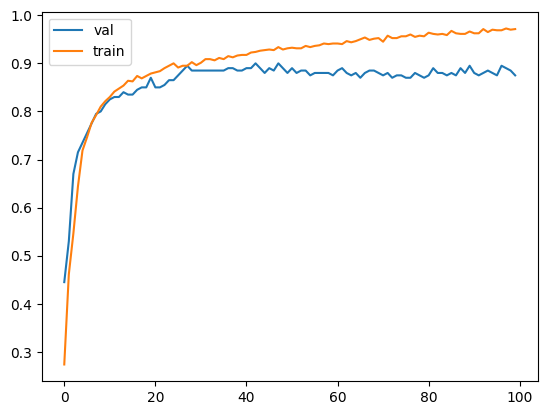

In [204]:
plt.plot(t_model.history['val_accuracy'])
plt.plot(t_model.history['accuracy'])
plt.legend(['val', 'train'])

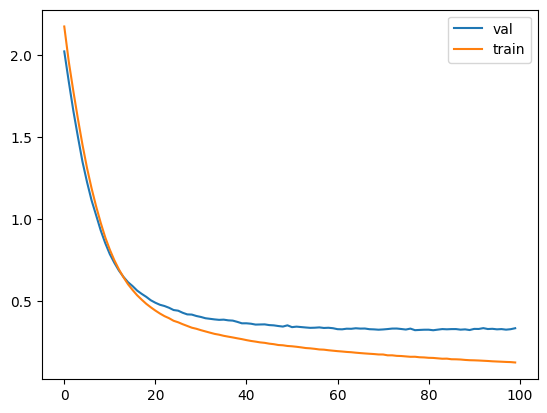

In [205]:
plt.plot(t_model.history['val_loss'])
plt.plot(t_model.history['loss'])
plt.legend(['val', 'train'])

# Model evaluation on test data

In [206]:
loss , accuracy = model.evaluate(x_test, y_test)
print('loss:', loss)
print('Accuracy:', accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.2579
loss: 0.2681125998497009
Accuracy: 0.925000011920929


# Predict result by model

In [207]:
# The predict_classes function outputs the highest probability class
# according on the trained classifier for each input example.
predicted= model.predict(x_test).argmax(axis=1)
print('Predicted:', predicted)
print('True Label:', y_test_original)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predicted: [7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 5 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label: [7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


In [208]:
predicted == y_test_original

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [209]:
np.mean(predicted == y_test_original)


np.float64(0.925)

In [210]:

conf_matrix = tf.math.confusion_matrix(
    labels=y_test_original,
    predictions=predicted,
    num_classes=10
)
print(conf_matrix.numpy())

[[13  0  0  0  0  2  0  0  0  0]
 [ 0 12  0  0  1  1  0  0  0  0]
 [ 0  1 21  0  1  0  0  0  0  0]
 [ 0  0  1 20  0  0  1  1  0  1]
 [ 0  0  0  0 15  1  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  1  0  0  0 15  0  0  1]
 [ 0  0  1  0  1  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 25]]


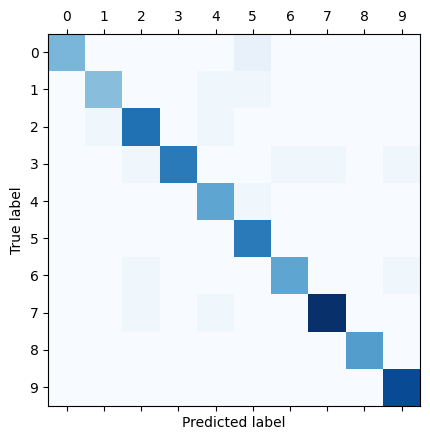

In [211]:
plt.matshow(conf_matrix, cmap='Blues')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label');